In [14]:
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set_context('notebook')
pd.set_option('display.max_columns', None)

# clean training data
> * In learning from data, it warns us about data snooping. Said if you involve test data in the learning process, the model's efficacy is compromised. However, you still need to clean data right?  
* has automated this process as `load_testing_data()` in `project.py`

In [15]:
df = pd.read_csv('./data/test.csv')
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
df.isnull().apply(np.sum)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

1. Age is not crazy distribution, just use avg to fill na
2. Cabin will use the same blind default strategy as I did for training data
3. Fare is skewed, I will use Q1 to fill that only one missed data

/home/lucas/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


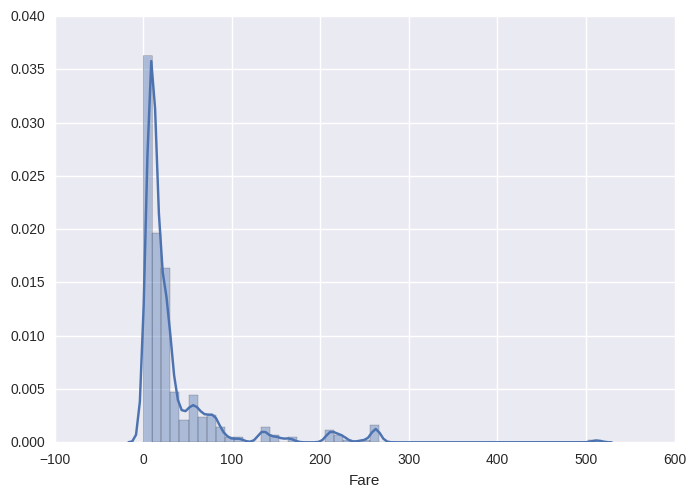

In [17]:
sns.distplot(df.Fare.dropna())

In [18]:
df.Age.fillna(value=df.Age.mean(), inplace=True)
df.Cabin.fillna(value='D', inplace=True)
df.Fare.fillna(value=df.Fare.dropna().quantile(q=.25, interpolation='midpoint'), inplace=True)

In [19]:
df.isnull().apply(np.sum)

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

this is the only difference between training data. They have different kind of NaN, the rest (labelize categorical dta) is the same